# Light distribution

- In this example we have a $5 \times 5 \times 0.6$ cm$^2$ monolithic scintillators of LaBr$_3$, encapsulated in a mechanical frame and covered on three of its faces with a light scattering coating ang glued to a glass on its fourth face (one of the $5 \times 5$ cm$^2$ face). A $16 \times 16$ photodetector array consisting of $6 \times 6$mm$^2$ SiPM is mounted on the glass to collect the scintillation light induced by a $^{57}$Co point source set above the center of the scintillator. It emits 122 keV $\gamma$-rays only along the z-axis, toards the scintillator. For each scintillation event, the light is collected in the the 256 channels which a photodetection efficiency of 40%.
- The goal here is to study the light distribution for each scintillation event, collected in the photdetector array, which is at $z=0$ a binomial random distribution will be applied on each pixel to represent the photodetection efficiency. You can display a couple of distributions as well as its mean on all the events. You can run the Gate simulation or use the given *CamPos_0.hits.npy* file.
- Do the same study, moving the source position in another position.

In [1]:
pwd

'/home/mverdier/Documents/IMNC/Gate_SC/Formation_CNRS/2022/Wednesday/Optical_Photons/Optical_ScintCam'

In [2]:
! Gate main.mac

[G4] 
[G4] **************************************************************
[G4]  Geant4 version Name: geant4-10-07-patch-02    (11-June-2021)
[G4]                        Copyright : Geant4 Collaboration
[G4]                       References : NIM A 506 (2003), 250-303
[G4]                                  : IEEE-TNS 53 (2006), 270-278
[G4]                                  : NIM A 835 (2016), 186-225
[G4]                              WWW : http://geant4.org/
[G4] **************************************************************
[G4] 
[Core-0] Initialization of geometry
[Core-0] Initialization of physics
[Core-0] Initialization of actors
[Core-0] 
[Core-0] *************************************************
[Core-0]  GATE version 9.1 (2021)
[Core-0]  Copyright : OpenGATE Collaboration
[Core-0]  Reference : Phys. Med. Biol. 49 (2004) 4543-4561
[Core-0]  Reference : Phys. Med. Biol. 56 (2011) 881-901
[Core-0]  Reference : Med. Phys. 41(6)    (2014)
[Core-0]  http://www.opengatecollaboration.org 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
hits = np.load('CamPos_0.hits.npy')
print(hits)
print(hits.dtype)

[( 22,    1, 0, 1.15845075e-10, 0.01      , 0,  0, 0, 1,  0.       ,  0.       , 5.27052,  0.       ,  0.       , -0.2294799, -0.        , -0.        , -1.        , 1.220e-01, 3.2294798, 34.72948  , 0., 4.5, b'PhotoElectric', b'NULL', b'NULL', 0, 0, 1, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 1, 0, 0, 0)
 (-22, 7716, 1, 4.85496743e-11, 0.01000002, 0,  0, 0, 1,  5.455398 ,  1.0688839, 0.     ,  5.455398 ,  1.0688839, -1.25     ,  0.71215254,  0.13953306, -0.6880184 , 3.263e-06, 3.6336238,  7.6604347, 0., 4.5, b'Transportation', b'NULL', b'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, 1, 0, 0, 0)
 (-22, 7715, 1, 1.05667510e-10, 0.01000003, 0,  0, 0, 1, 15.32026  , -3.9361856, 0.     , 15.32026  , -3.9361856, -1.25     ,  0.91887736, -0.23608424, -0.31611484, 3.263e-06, 7.908518 , 16.672802 , 0., 4.5, b'Transportation', b'NULL', b'NULL', 0, 0, 0, -1, -1, -1, -1, -1, -1, -1, 0., 0., 40., 0, 0, 0, 0, 0, -1, -1,

In [5]:
eid = np.unique(hits["eventID"])
cond = np.abs(hits['edep'] - 0.122) < 0.001
print(cond.sum(), len(eid))
g_eid = hits["eventID"][cond]

78 89


In [9]:
frames = np.zeros((len(eid), 16, 16))
frames_pde = np.zeros((len(eid), 16, 16))
cond_opt = hits["PDGEncoding"] == -22
for i in range(len(g_eid)):
    cond_evt = hits["eventID"] == g_eid[i]
    opt_hits = hits[cond_evt & cond_opt]
    x_pos = opt_hits["posX"]
    y_pos = opt_hits["posY"]
    z_pos = opt_hits["posZ"]
    cond_z0 = z_pos == 0
    frames[i], x, y = np.histogram2d(x_pos[cond_z0], y_pos[cond_z0], bins=16, range=((-25, 25), (-25, 25)))
    frames_pde[i] = np.random.binomial(frames[0].astype(int), 0.4)

In [10]:
print(frames.sum())

458431.0


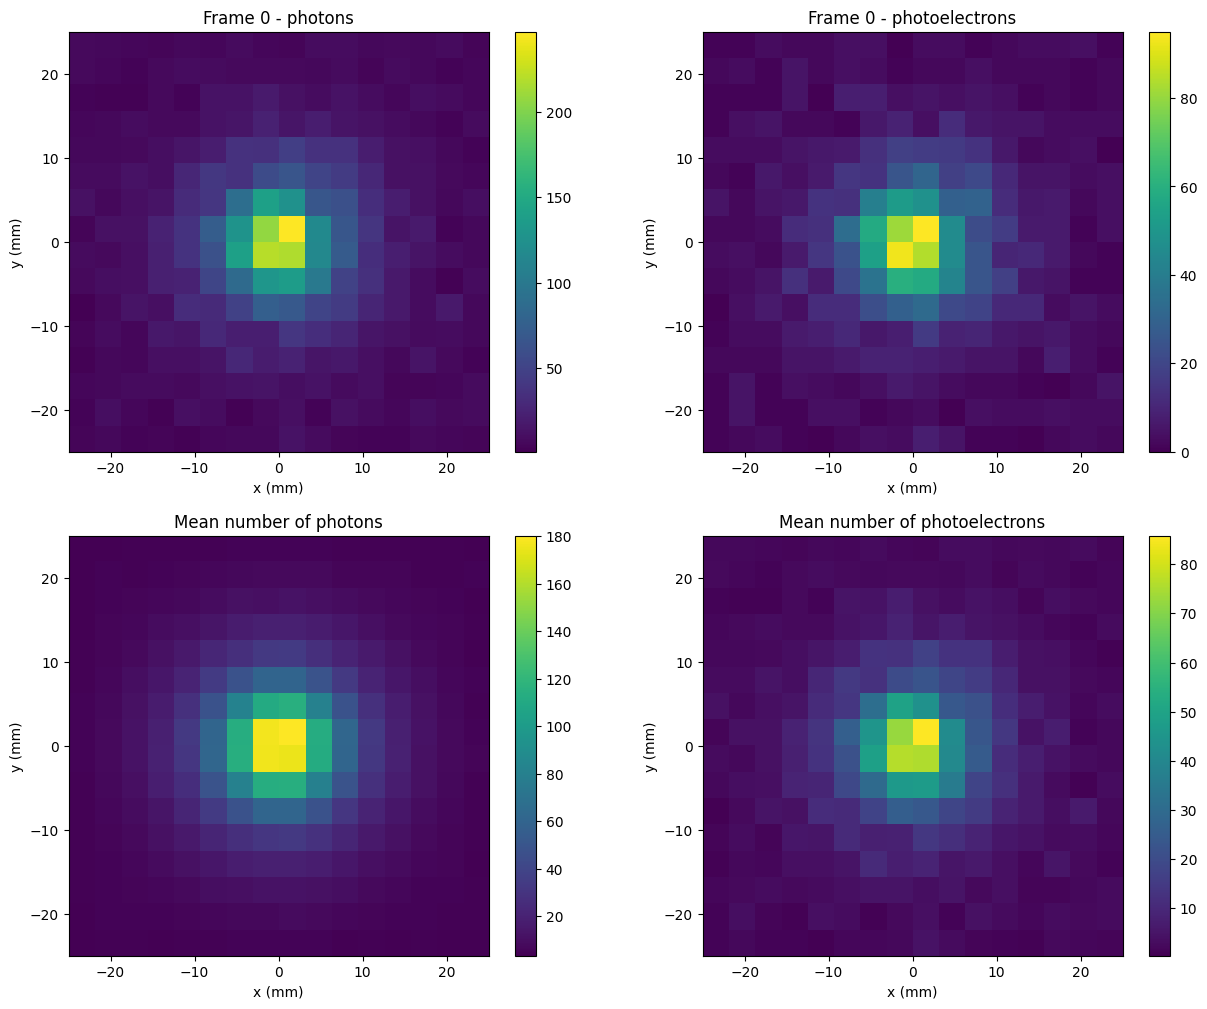

In [16]:
extent=(-25, 25, -25, 25)
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
plt.imshow(frames[0], aspect='equal', extent=extent)
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("Frame 0 - photons")

plt.subplot(2, 2, 2)
plt.imshow(frames_pde[0], aspect='equal', extent=extent)
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("Frame 0 - photoelectrons")

plt.subplot(2, 2, 3)
plt.imshow(frames.mean(axis=0), aspect='equal', extent=extent)
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("Mean number of photons")

plt.subplot(2, 2, 4)
plt.imshow(frames_pde.mean(axis=0), aspect='equal', extent=extent)
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")
plt.title("Mean number of photoelectrons")

plt.show()